In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mth
# import myclusterlib as cllib

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# K-Means Clustering

## Wikipedia Definition of K-Mean Clustering

### **k-means clustering** is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

### It is an Unsupervised Learning, i.e. the model that does NOT know the Actual Prediction. It explores the data and tries to find a pattern in the data and learns from the pattern

###  K-Means Clustering can be defined as the task of 
* #### Identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different. 
* #### It is the process of finding homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a similarity measure 
* #### Similarity Measures can be  (a) An Euclidean-based distance or (b) correlation-based distance. 
* #### We will use the Euclidian Distance as our Similarity Measure

## How Does K-Means Clustering Work

* Specify number of clusters K.
* Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement. Call this the **Current Centroid**
* Assign each data point to the closest cluster (centroid).
* Re-compute the Centroid for each cluster by calculating the **x_mean** and **y-mean** of all the data points in the cluster. Call this the **New Centroid** (for each cluster).
* If **New Centriod** is different from the **Current Centroid**, set **Current Centroid** = **New Centroid** and keep iterating until **New Centroid** == **Current Centroid**,  i.e assignment of data points to clusters isn’t changing.

## Choosing the value of K

One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE). Like this:

var sse = {};

for (var k = 1; k <= maxK; ++k) {

    sse[k] = 0;
    clusters = kmeans(dataset, k);
    clusters.forEach(function(cluster) {
        mean = clusterMean(cluster);
        cluster.forEach(function(datapoint) {
            sse[k] += Math.pow(datapoint - mean, 2);
        });
    });
}

Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

**The figure below shows the Distortion Score for various K values. Looks like K = 8 is a best value of K**

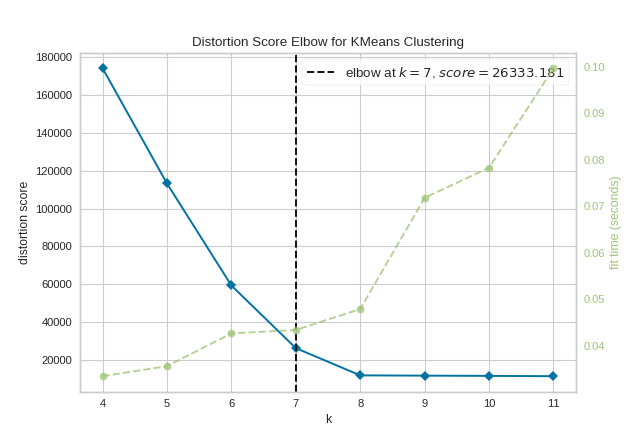


## The Python functions to be developed are

* ### euclidian_distance --- Calculates the Euclidian Distance between two points (x1, y1) and (x2, y2)

* ### assign_cluster --- selects K (2 in our case) arbitrary centrois and assigns each data point to one the K (2 in our case) clusters

* ### calc_new_centroid --- calculates the new_centroid as the (x_mean, y_mean) of the points in each cluster as assigned in the assign_cluster function

* ### do_cluster --- iterates while the new_cluster != current_cluster. Draws the cluster data points and their centroid for each iteration starting with the orginal data set (before clustering)

In [4]:
data = pd.DataFrame({'x' :[5, 10, 15, 24, 30, 55, 60, 71, 80,85], 'y' : [3, 15, 12, 10, 45, 52, 78, 80, 91, 70]})

In [5]:
data.head(10)

,x,y
0,5,3
1,10,15
2,15,12
3,24,10
4,30,45
5,55,52
6,60,78
7,71,80
8,80,91
9,85,70


## Initial Clustering with arbitrary centroid

In [6]:
ac1 = cllib.assign_cluster(data['x'][0], data['x'][1], data['y'][0], data['y'][1], data)

NameError: name 'cllib' is not defined

In [ ]:
ac1.head(10)

## Iteration - 2

In [ ]:
centroid1_x, centroid1_y, centroid2_x, centroid2_y = cllib.calc_new_centroid(ac1)

In [ ]:
ac2 = cllib.assign_cluster(centroid1_x, centroid1_y, centroid2_x, centroid2_y, data)

In [ ]:
ac2.head(10)

## Iteration - 3

In [ ]:
centroid1_x, centroid1_y, centroid2_x, centroid2_y = cllib.calc_new_centroid(ac2)

In [ ]:
ac3 = cllib.assign_cluster(centroid1_x, centroid1_y, centroid2_x, centroid2_y, data)

In [ ]:
ac3.head(10)

## Iteration - 4

In [ ]:
centroid1_x, centroid1_y, centroid2_x, centroid2_y = cllib.calc_new_centroid(ac3)

In [ ]:
ac4 = cllib.assign_cluster(centroid1_x, centroid1_y, centroid2_x, centroid2_y, data)

In [ ]:
ac4.head(10)

In [ ]:
centroid1_x, centroid1_y, centroid2_x, centroid2_y = cllib.calc_new_centroid(ac4)

In [7]:
my_data = pd.DataFrame({'x' :[5, 10, 15, 24, 30, 55, 60, 71, 80,85], 'y' : [3, 15, 12, 10, 45, 52, 78, 80, 91, 70]})

#plt.scatter(my_data['x'],my_data['y'], label='True Position') 
#plt.show()
#c1_x, c1_y, c2_x, c2_y, clustered_data = cllib.do_cluster(my_data)


In [8]:
from sklearn.cluster import KMeans 

KMeans(n_clusters=2)

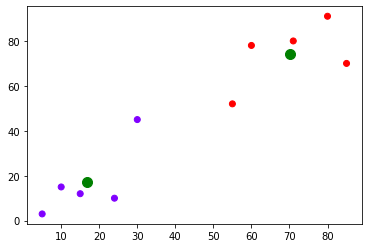

In [9]:
kmeans = KMeans(n_clusters=2)  
kmeans.fit(my_data)  

plt.scatter(my_data['x'],my_data['y'], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], s=100, color='green')

KMeans(n_clusters=3)

[[13.5  10.  ]
 [74.   79.75]
 [42.5  48.5 ]]
[0 0 0 0 2 2 1 1 1 1]


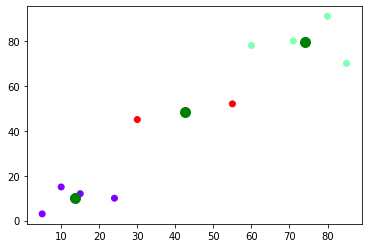

In [10]:
kmeans = KMeans(n_clusters=3)  
kmeans.fit(my_data)  

print(kmeans.cluster_centers_) 
print(kmeans.labels_)  
plt.scatter(my_data['x'],my_data['y'], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], s=100, color='green')  

In [11]:
from sklearn.datasets import load_iris

In [12]:
iris = load_iris()

In [13]:
iris.feature_names
iris.data

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
iris.target_names
iris.target

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=3)
kmodel = kmeans.fit(iris.data)

In [16]:
kmodel.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [17]:
kmodel.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [18]:
pd.crosstab(iris.target, kmodel.labels_)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,48,2
2,0,14,36


In [19]:
iris_df = pd.DataFrame(iris.data)

iris_df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

iris_df.head(20)

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [20]:
iris_target = pd.DataFrame(iris.target)
iris_target.columns = ['Target Species']

In [21]:
iris_target.head(10)

,Target Species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


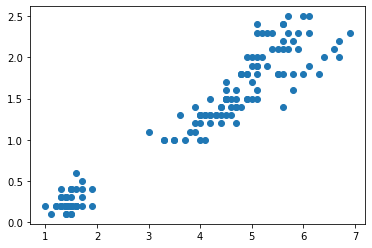

In [22]:
#colormap = np.array['Red', 'Blue', 'Green']
plt.scatter(iris_df['Petal Length'], iris_df['Petal Width'])

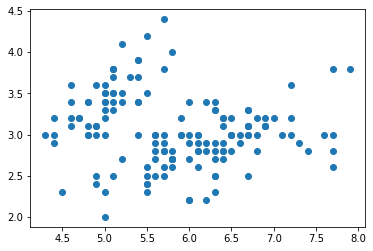

In [23]:
plt.scatter(iris_df['Sepal Length'], iris_df['Sepal Width'])

In [24]:
colormap = np.array(['Red', 'Blue', 'Green'])

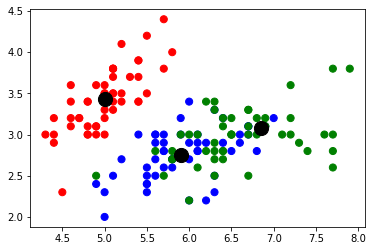

In [25]:
plt.scatter(iris_df['Sepal Length'], iris_df['Sepal Width'], c=colormap[iris.target], s =50)
plt.scatter(kmodel.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = 'black')

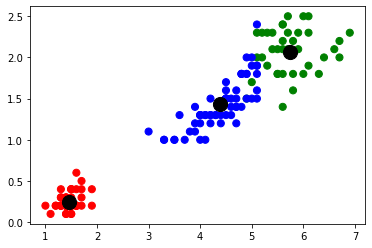

In [26]:
plt.scatter(iris_df['Petal Length'], iris_df['Petal Width'], c=colormap[kmodel.labels_], s =50)
plt.scatter(kmodel.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 200, c = 'black')

## Some real life applications of Clustering

* ### Clustering helps marketers improve their customer base and work on the target areas. It helps group people (according to different criteria’s such as willingness, purchasing power etc.) based on their similarity in many ways related to the product under consideration.
* ### Clustering helps in identification of groups of houses on the basis of their value, type and geographical locations.

* ### Clustering can be used to group the locations of maximum accident prone areas in a city into clusters and define a **Cluster Center** for each cluster, which will be the locations where the **Hospital Emergency Units** will open. These Clusters centers are the centroids of each cluster and are at a minimum distance from all the points of a particular cluster, henceforth, the Emergency Units will be at minimum distance from all the accident prone areas within a cluster.

* ### Let’s consider the data on drug-related crimes in a city. The data consists of crimes due to various drugs that include, Heroin, Cocaine to prescription drugs, especially by underage people. The crimes resulted due to these substance abuse can be brought down by starting de-addiction centres in areas most afflicted by this kind of crime. With the available data, different objectives can be set. They are:

      * Classify the crimes based on the abuse substance to detect prominent cause.
      * Classify the crimes based on age groups.
      * Analyze the data to determine what kinds of de-addiction centre is required.
      * Find out how many de-addiction centres need to be setup to reduce drug related crime rate.